# **Logistic Regresion**

```scikit-learn``` webpage [here](https://scikit-learn.org/stable/index.html) \
```Iris``` dataset description [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris) \
```LogisticRegression``` documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic%20regression#sklearn.linear_model.LogisticRegression)

### In Synthetic data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

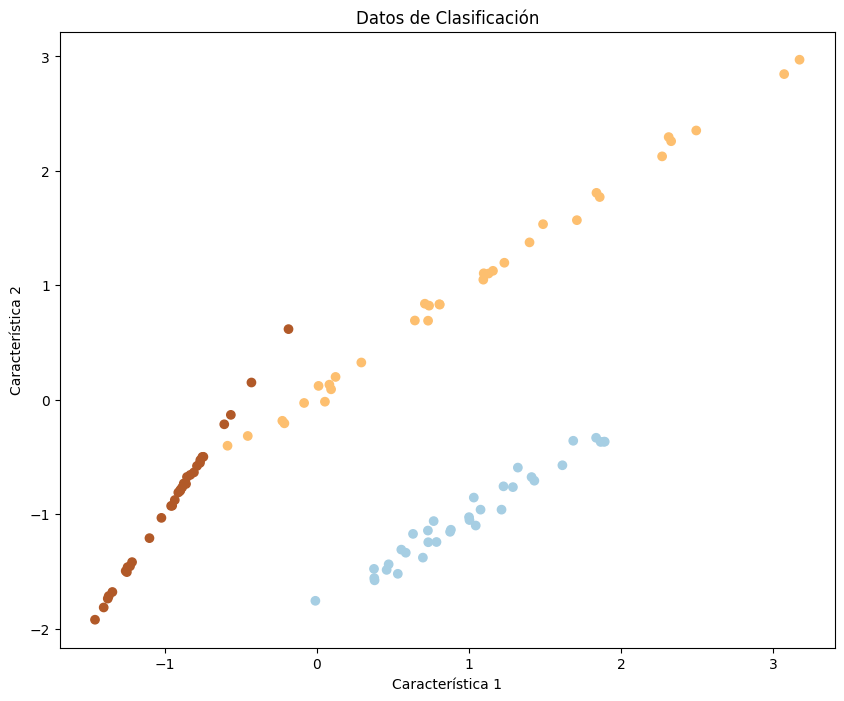

In [2]:


# Generar datos de clasificación
X, y = make_classification(
    n_samples=100,        # Número de muestras
    n_features=2,         # Número de características
    n_redundant=0,        # Número de características redundantes
    n_informative=2,      # Número de características informativas
    n_clusters_per_class=1,  # Número de clústeres por clase
    n_classes=3,         # Número de clases
    random_state=42       # Semilla para la reproducibilidad
)

# Graficar los datos
_, ax = plt.subplots(figsize=(10, 8))  # Tamaño de la figura
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='Paired')  # Graficar puntos con colores por clase
ax.set_xlabel('Característica 1')
ax.set_ylabel('Característica 2')
ax.set_title('Datos de Clasificación')
plt.show()

In [3]:
# Create an instance
logistic_regression = LogisticRegression()

# Train the model
logistic_regression.fit(X, y)  # (Samples, Features)


LogisticRegression()

### **Decision boundaries**

In [4]:
# Min-Max values for the grid of decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Create grid
x_grid, y_grid = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Estimate predictions over the grid
predictions = logistic_regression.predict(np.c_[x_grid.ravel(), y_grid.ravel()])
print(predictions.shape)


(458160,)


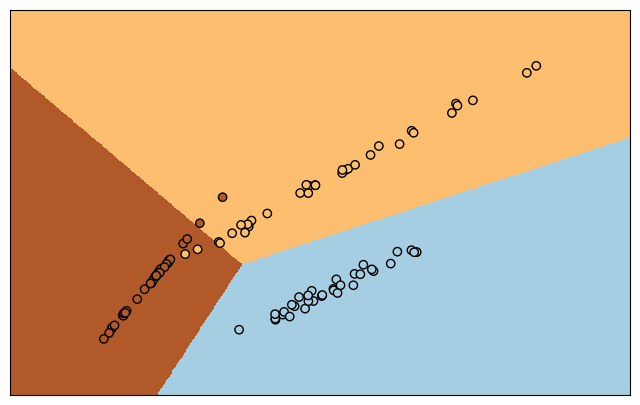

In [5]:
# Reshape predictions
predictions = predictions.reshape(x_grid.shape)

# Draw grid
_, ax = plt.subplots(figsize=(8, 5))
ax.pcolormesh(x_grid, y_grid, predictions, cmap="Paired")

# Scatter real values
ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap="Paired")

ax.set_xticks(())
ax.set_yticks(())

plt.show()


### In Real data

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

In [7]:
from sklearn.datasets import load_iris

# Load iris dataset
iris = load_iris()
iris_x = iris.data  # Features
iris_y = iris.target  # Labels

# Print shapes
print(iris_x.shape, iris_y.shape)


(150, 4) (150,)


In [9]:
from sklearn.linear_model import LogisticRegression

# Create an instance with increased max_iter
logistic_regression = LogisticRegression(max_iter=1000)  # Increase the number of iterations

# Train the model
logistic_regression.fit(iris_x, iris_y)



LogisticRegression(max_iter=1000)

In [13]:

# Min-Max values for the grid of decision boundaries
x_min, x_max = iris_x[:, 0].min() - 1, iris_x[:, 0].max() + 1
y_min, y_max = iris_x[:, 1].min() - 1, iris_x[:, 1].max() + 1

# Create grid
x_grid, y_grid = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Create an empty array to hold the predictions
grid_points = np.c_[x_grid.ravel(), y_grid.ravel(), np.zeros_like(x_grid.ravel()), np.zeros_like(x_grid.ravel())]

# Estimate predictions over the grid
predictions = logistic_regression.predict(grid_points)
predictions = predictions.reshape(x_grid.shape)

print(predictions.shape)

(440, 560)


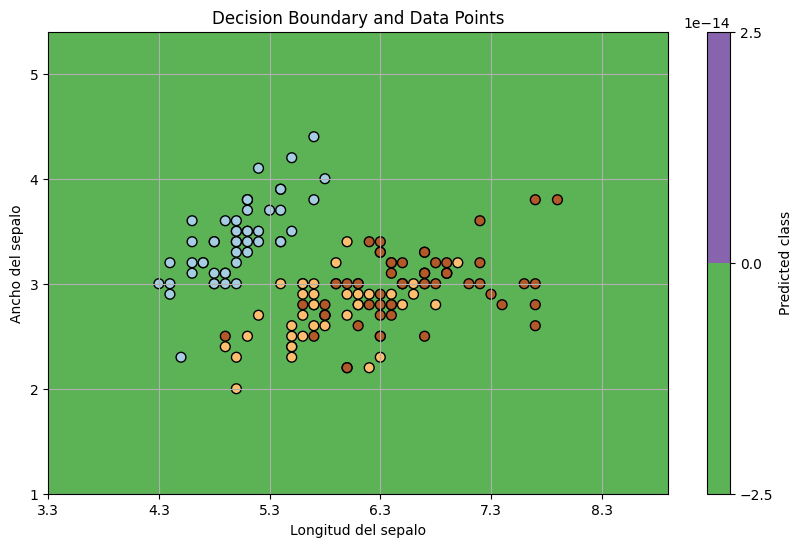

In [16]:
_, ax = plt.subplots(figsize=(10, 6))
contour = ax.contourf(x_grid, y_grid, predictions, cmap="Paired", alpha=0.8)
contour_lines = ax.contour(x_grid, y_grid, predictions, colors='k', levels=[0.5])

# Scatter real values
scatter = ax.scatter(iris_x[:, 0], iris_x[:, 1], c=iris_y, edgecolors='k', cmap="Paired", s=50)

# Add a colorbar
plt.colorbar(contour, ax=ax, orientation='vertical', label='Predicted class')

# Add labels and title
ax.set_xlabel('Longitud del sepalo')
ax.set_ylabel('Ancho del sepalo')
ax.set_title('Decision Boundary and Data Points')

# Set axis limits
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

# Display grid lines and ticks
ax.grid(True)
ax.set_xticks(np.arange(x_min, x_max, 1))
ax.set_yticks(np.arange(y_min, y_max, 1))

plt.show()